# Importing Libraries


In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [ ]:
# !pip install scikit-learn==1.3.0

# Loading data

In [2]:
df = pd.read_excel("UNESWADataSet.xlsx")

In [9]:
df.duplicated().sum()


5396

# Data Pre-Processing

**Dealing with Missing values, duplicates and datatypes**

In [4]:
df.shape

(1048575, 45)

In [5]:
df.nunique()


VisitID                      1042051
ClientID                      403153
FacilityCode                     272
VisitDate                        400
Sex                                3
Age                              115
AgeGroup                          14
Impotence                          2
CVAStroke                          2
PatientLifestyle                   5
FamilyHistory                      3
Smoking                            1
Alcohol                            1
PeakFlowmeter                    177
BPDiastolic                      121
BPSystolic                       224
BMI                             6966
NutritionalStatus                  7
Score                             21
RiskOutcome                        2
FBGOutcome                         2
RBGOutcome                         3
Screened                           1
ScreeningResult                    3
ScreenedFor                        5
DiagnosedWithDiabetes              2
DiagnosedWithHypertension          2
T

In [6]:
df.dtypes

VisitID                              object
ClientID                             object
FacilityCode                         object
VisitDate                    datetime64[ns]
Sex                                  object
Age                                   int64
AgeGroup                             object
Impotence                           float64
CVAStroke                           float64
PatientLifestyle                     object
FamilyHistory                        object
Smoking                              object
Alcohol                              object
PeakFlowmeter                       float64
BPDiastolic                         float64
BPSystolic                          float64
BMI                                 float64
NutritionalStatus                    object
Score                               float64
RiskOutcome                          object
FBGOutcome                           object
RBGOutcome                           object
Screened                        

In [7]:
df['AgeGroup'].unique()


array(['20 - 24', '15 - 19', '25 - 29', '35 - 39', '30 - 34', '55 - 59',
       '>= 60', '45 - 49', '50 - 54', '40 - 44',
       datetime.datetime(2025, 4, 1, 0, 0), '< 1',
       datetime.datetime(2014, 10, 1, 0, 0),
       datetime.datetime(2025, 9, 5, 0, 0)], dtype=object)

In [8]:

df

,VisitID,ClientID,FacilityCode,VisitDate,Sex,Age,AgeGroup,Impotence,CVAStroke,PatientLifestyle,...,TestResult,DiabetesControl,WithHypertension,HypertensionDiagnosisDate,HIVPositive,HIVDiagnosisDate,ARTStartDate,TBStartDate,Complication,Death
0,E7018C88-8A96-457C-AB43-49CCB25E8510,FE08EBAD-13EB-40FF-9C88-0CF1EDE45BB2,M131,2024-06-20,Male,23,20 - 24,NaN,NaN,NaN,...,NaN,NaN,0,NaT,0,NaT,NaT,NaT,NaN,Deceased
1,9EBE8A7B-CC18-46CB-8A03-99408BD4EB87,FE08EBAD-13EB-40FF-9C88-0CF1EDE45BB2,M208,2024-03-07,Male,22,20 - 24,NaN,NaN,NaN,...,NaN,NaN,0,NaT,0,NaT,NaT,NaT,NaN,Deceased
2,4C7CB456-3B03-4A87-8E0C-E845DCBE7E5E,379858A3-F6F1-4F84-AC73-0CF244D17C02,S001,2024-05-27,Female,18,15 - 19,NaN,NaN,NaN,...,NaN,NaN,0,NaT,0,NaT,NaT,NaT,NaN,Deceased
3,2BB14EDC-19E7-4F9D-AC8F-5F2B8897681E,4E416F2B-BF9A-4108-BFD8-0CF281B262CC,H093,2024-03-07,Female,25,25 - 29,NaN,NaN,NaN,...,NaN,NaN,0,NaT,0,NaT,NaT,NaT,NaN,Deceased
4,CCC72146-D726-4210-8832-7971F55BDAB7,4E416F2B-BF9A-4108-BFD8-0CF281B262CC,H093,2024-02-15,Female,25,25 - 29,NaN,NaN,NaN,...,NaN,NaN,0,NaT,0,NaT,NaT,NaT,NaN,Deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,35C11D78-9886-41B4-AD66-E543161984A5,1C743632-C555-47AA-AF85-E4FB78F15694,S097,2024-02-15,Female,77,>= 60,NaN,NaN,NaN,...,NaN,NaN,1,2019-01-03,1,2005-11-16,2005-12-20,NaT,NaN,Deceased
1048571,E1B313C2-78F2-4453-A509-71E53477ADA4,BCEE082B-994C-4903-A400-E4FBFA8FA8F1,L031,2024-07-23,Female,50,50 - 54,NaN,NaN,NaN,...,NaN,NaN,1,2019-04-05,0,NaT,NaT,NaT,NaN,Deceased
1048572,43E6C081-B779-44E2-AC5E-84BEAB63B148,BCEE082B-994C-4903-A400-E4FBFA8FA8F1,L069,2024-12-24,Female,51,50 - 54,2.0,2.0,NaN,...,Positive,Uncontrolled,1,2019-04-05,0,NaT,NaT,NaT,NaN,Deceased
1048573,B7FEB313-4B97-4C72-9B07-C82F8F0818F8,B47E178F-7956-4D49-9318-E4FC04CD795A,S003,2024-11-07,Female,20,20 - 24,NaN,NaN,NaN,...,NaN,NaN,0,NaT,0,NaT,NaT,NaT,NaN,Deceased


In [9]:
df.isnull().sum()


VisitID                            0
ClientID                           0
FacilityCode                       0
VisitDate                          0
Sex                                0
Age                                0
AgeGroup                           0
Impotence                     935157
CVAStroke                     935157
PatientLifestyle              963521
FamilyHistory                 860691
Smoking                      1022535
Alcohol                       976977
PeakFlowmeter                1047935
BPDiastolic                    61207
BPSystolic                     61161
BMI                            35041
NutritionalStatus              34751
Score                         712469
RiskOutcome                   712469
FBGOutcome                   1042386
RBGOutcome                   1006627
Screened                           0
ScreeningResult              1008905
ScreenedFor                        0
DiagnosedWithDiabetes              0
DiagnosedWithHypertension          0
T

In [10]:
test = df.Impotence.unique()
test

array([nan,  2.,  1.])

In [11]:
test = df.DiagnosedWithDiabetes.unique()
test

array([0, 1], dtype=int64)

In [12]:
test = df.CVAStroke.unique()
test

array([nan,  2.,  1.])

In [13]:
test = df.PatientLifestyle.unique()
test

array([nan, 'Alcohol consumption', 'Physically inactive',
       'Unhealthy diet', 'Smoking', 'Physically active'], dtype=object)

In [14]:
test = df.FamilyHistory.unique()
test

array([nan, 'Diabetes', 'Hypertension', 'Asthma'], dtype=object)

In [15]:
test = df.Smoking.unique()
test

array([nan, 'Smoking'], dtype=object)

In [16]:
test = df.Alcohol.unique()
test

array([nan, 'Alcohol consumption'], dtype=object)

In [17]:
test = df.NutritionalStatus.unique()
test

array(['Normal', nan, 'Overweight', 'Obese', 'Mild',
       'Severely underweight', 'SAM', 'MAM'], dtype=object)

In [18]:
test = df.RiskOutcome.unique()
test

array([nan, 'Not at risk', 'At Risk (Factor)'], dtype=object)

In [19]:
test = df.FBGOutcome.unique()
test

array([nan, 'Normal', 'Positive'], dtype=object)

In [20]:
test = df.RBGOutcome.unique()
test

array([nan, 'Normal', 'RequiresFBG', 'Positive'], dtype=object)

In [21]:
test = df.ScreeningResult.unique()
test

array([nan, 'Normal', 'Positive', 'RequiresFBG'], dtype=object)

**Properly formarting field**

In [22]:
df['ScreenedFor'] = df['ScreenedFor'].replace('Hypertension_Diabetes_Diabetes','Hypertension_Diabetes' )
df['ScreenedFor'] = df['ScreenedFor'].replace('_Diabetes_Diabetes','_Diabetes' )
df['ScreenedFor'] = df['ScreenedFor'].replace('_Diabetes','Diabetes' )


In [23]:
test = df.groupby('ScreenedFor')['ScreenedFor'].count()
test

ScreenedFor
Diabetes                  61207
Hypertension             711304
Hypertension_Diabetes    276064
Name: ScreenedFor, dtype: int64

In [24]:
test = df.Complication.unique()
test

array([nan, 'Diabetic retinopathy', 'Neuropathy', 'Fatigue', 'Infection',
       'Difficulty urinating', 'Ulcer/Injury', 'Pedal pulses', 'Weakness',
       'Hypertensive retinopathy', 'Poor blood flow', 'Posterior tibial',
       'Irregular heartbeat', 'Edema', 'Change of skin color',
       'Shortness of breath', 'Confusion', 'Decrease in amount of urine',
       'Nausea', 'Dorsal pedis', 'Heat on touch'], dtype=object)

In [25]:
test = df.groupby('DiagnosedWithDiabetes')['DiagnosedWithDiabetes'].count()
test

DiagnosedWithDiabetes
0    972035
1     76540
Name: DiagnosedWithDiabetes, dtype: int64

In [26]:
test = df.Death.unique()
test

array(['Deceased', 'Alive'], dtype=object)

In [27]:
test = df.TestResult.unique()
test

array([nan, 'Normal', 'Positive', 'PositiveNormal', 'NormalPositive',
       'Diabetes_Positive', 'PositivePositive', 'NormalNormal',
       'Diabetes_Normal'], dtype=object)

In [28]:
test = df.Tested.unique()
test

array([nan, 'Yes'], dtype=object)

In [29]:
df.Screened.unique()

array(['Yes'], dtype=object)

In [30]:
df.Impotence.unique()

array([nan,  2.,  1.])

**Dropping time related fields** :
Dropping Unnecesary fields since we are looking to predict the possility of diatetes

In [31]:
df = df.drop(columns = ['DiagnosisDate','TreatmentDate','HypertensionDiagnosisDate', 'HIVDiagnosisDate', 'ARTStartDate','TBStartDate'])

**Replacing null values**

In [32]:
df['Impotence'] = df['Impotence'].fillna(1)
df['CVAStroke'] = df['CVAStroke'].fillna(1)
df['PatientLifestyle'] = df['PatientLifestyle'].fillna('None')
df['FamilyHistory'] = df['FamilyHistory'].fillna('None')
df['Smoking'] = df['Smoking'].fillna('Not Smoking')
df['Alcohol'] = df['Alcohol'].fillna('No Alchohol')
df['NutritionalStatus'] = df['NutritionalStatus'].fillna('Normal')
df['RiskOutcome'] = df['RiskOutcome'].fillna('Not at risk')
df['FBGOutcome'] = df['FBGOutcome'].fillna('Normal')
df['RBGOutcome'] = df['RBGOutcome'].fillna('Normal')
df['ScreeningResult'] = df['ScreeningResult'].fillna('Normal')
df['Complication'] = df['Complication'].fillna('None')
df['TestResult'] = df['TestResult'].fillna('Normal')
df['Tested'] = df['Tested'].fillna('No')

In [33]:
df['PeakFlowmeter'] = df['PeakFlowmeter'].fillna(df['PeakFlowmeter'].median() )
df['BPDiastolic'] = df['BPDiastolic'].fillna(df['BPDiastolic'].median() )
df['BPSystolic'] = df['BPSystolic'].fillna(df['BPSystolic'].median() )
df['BMI'] = df['BMI'].fillna(df['BMI'].median() )
df['Score'] = df['Score'].fillna(df['Score'].median() )
df['GlucoseFasting'] = df['GlucoseFasting'].fillna(df['GlucoseFasting'].median() )
df['GlucoseRandom'] = df['GlucoseRandom'].fillna(df['GlucoseRandom'].median() )
df['HbA1C'] = df['HbA1C'].fillna(df['HbA1C'].median() )

**Converting datatype into integer**

In [34]:
df['Impotence'] = df['Impotence'].astype(int)
df['CVAStroke'] = df['CVAStroke'].astype(int)
df.dtypes

VisitID                              object
ClientID                             object
FacilityCode                         object
VisitDate                    datetime64[ns]
Sex                                  object
Age                                   int64
AgeGroup                             object
Impotence                             int32
CVAStroke                             int32
PatientLifestyle                     object
FamilyHistory                        object
Smoking                              object
Alcohol                              object
PeakFlowmeter                       float64
BPDiastolic                         float64
BPSystolic                          float64
BMI                                 float64
NutritionalStatus                    object
Score                               float64
RiskOutcome                          object
FBGOutcome                           object
RBGOutcome                           object
Screened                        

**Dropping all entries that are in date time formart intead of object in age group**

In [35]:
from datetime import datetime
df = df[~df['AgeGroup'].apply(lambda x:isinstance(x,datetime))]
df.AgeGroup.unique()

array(['20 - 24', '15 - 19', '25 - 29', '35 - 39', '30 - 34', '55 - 59',
       '>= 60', '45 - 49', '50 - 54', '40 - 44', '< 1'], dtype=object)

c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Simphiw

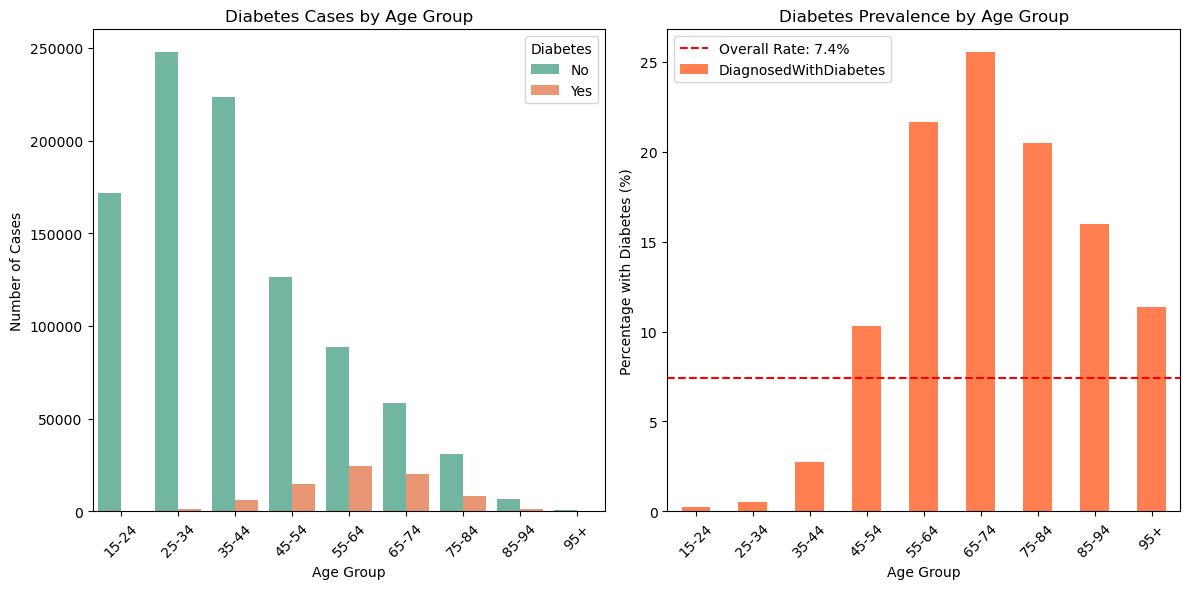

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
plt.figure(figsize=(12, 6))

# Create age bins for better visualization
bins = [15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95+']
df['AgeGroupBins'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plot 1: Count of diabetes cases by age group
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='AgeGroupBins', hue='DiagnosedWithDiabetes', palette='Set2')
plt.title('Diabetes Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Diabetes', labels=['No', 'Yes'])

# Plot 2: Percentage with diabetes by age group
plt.subplot(1, 2, 2)
diabetes_rate = df.groupby('AgeGroupBins')['DiagnosedWithDiabetes'].mean() * 100
diabetes_rate.plot(kind='bar', color='coral')
plt.title('Diabetes Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Diabetes (%)')
plt.xticks(rotation=45)
plt.axhline(y=df['DiagnosedWithDiabetes'].mean()*100, color='red', linestyle='--', 
            label=f'Overall Rate: {df["DiagnosedWithDiabetes"].mean()*100:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

**Encoding all neecessary fields in the dataframe**

In [37]:
from sklearn.preprocessing import LabelEncoder
df[['AgeGroup','PatientLifestyle','Sex', 'FamilyHistory', 'Smoking','Alcohol','NutritionalStatus','RiskOutcome', 'FBGOutcome', 'RBGOutcome', 'ScreeningResult','Screened', 'Complication', 'TestResult','Death','ScreenedFor','Tested', 'DiabetesControl' ]] = df[['AgeGroup','PatientLifestyle','Sex', 'FamilyHistory', 'Smoking','Alcohol','NutritionalStatus','RiskOutcome', 'FBGOutcome', 'RBGOutcome', 'ScreeningResult','Screened', 'Complication', 'TestResult','Death','ScreenedFor','Tested', 'DiabetesControl' ]].apply(LabelEncoder().fit_transform)

df.head(50)

,VisitID,ClientID,FacilityCode,VisitDate,Sex,Age,AgeGroup,Impotence,CVAStroke,PatientLifestyle,...,GlucoseFasting,GlucoseRandom,HbA1C,TestResult,DiabetesControl,WithHypertension,HIVPositive,Complication,Death,AgeGroupBins
0,E7018C88-8A96-457C-AB43-49CCB25E8510,FE08EBAD-13EB-40FF-9C88-0CF1EDE45BB2,M131,2024-06-20,1,23,1,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,15-24
1,9EBE8A7B-CC18-46CB-8A03-99408BD4EB87,FE08EBAD-13EB-40FF-9C88-0CF1EDE45BB2,M208,2024-03-07,1,22,1,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,15-24
2,4C7CB456-3B03-4A87-8E0C-E845DCBE7E5E,379858A3-F6F1-4F84-AC73-0CF244D17C02,S001,2024-05-27,0,18,0,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,15-24
3,2BB14EDC-19E7-4F9D-AC8F-5F2B8897681E,4E416F2B-BF9A-4108-BFD8-0CF281B262CC,H093,2024-03-07,0,25,2,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,25-34
4,CCC72146-D726-4210-8832-7971F55BDAB7,4E416F2B-BF9A-4108-BFD8-0CF281B262CC,H093,2024-02-15,0,25,2,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,25-34
5,82416C54-CDD8-4499-B1DC-6F1E37A30A89,D8381DD9-1B12-401D-8789-0CF2A3FF5747,H012,2024-05-30,1,36,4,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,35-44
6,E47E54F4-460E-4A74-B802-EBD6D5211504,12199FE5-5394-437A-9C00-0CF32A0E02D9,S128,2024-08-07,0,19,0,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,15-24
7,CD622445-33AA-40BB-AE2F-D9B09D64C052,BF53EAA0-29A4-4DF7-B1A6-0CF33FA35E69,L066,2024-03-28,1,34,3,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,25-34
8,957EB7C0-BF6E-49FE-B95C-441C3222E9CC,FE400B4A-0CFB-43FA-8FDB-0CF349CFC88B,L140,2024-11-07,0,25,2,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,25-34
9,7BA3FFC0-92ED-4D2A-9378-EFFD60583AEE,3DE1E4D7-54A4-4E84-BC96-0CF352E7799E,S003,2024-12-05,0,17,0,1,1,1,...,6.9,6.4,8.95,2,2,0,0,14,1,15-24


**Showing fields relationship using Correlation Graph**

In [38]:
df=df.drop(columns=['VisitID','ClientID','FacilityCode','AgeGroupBins'])

c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


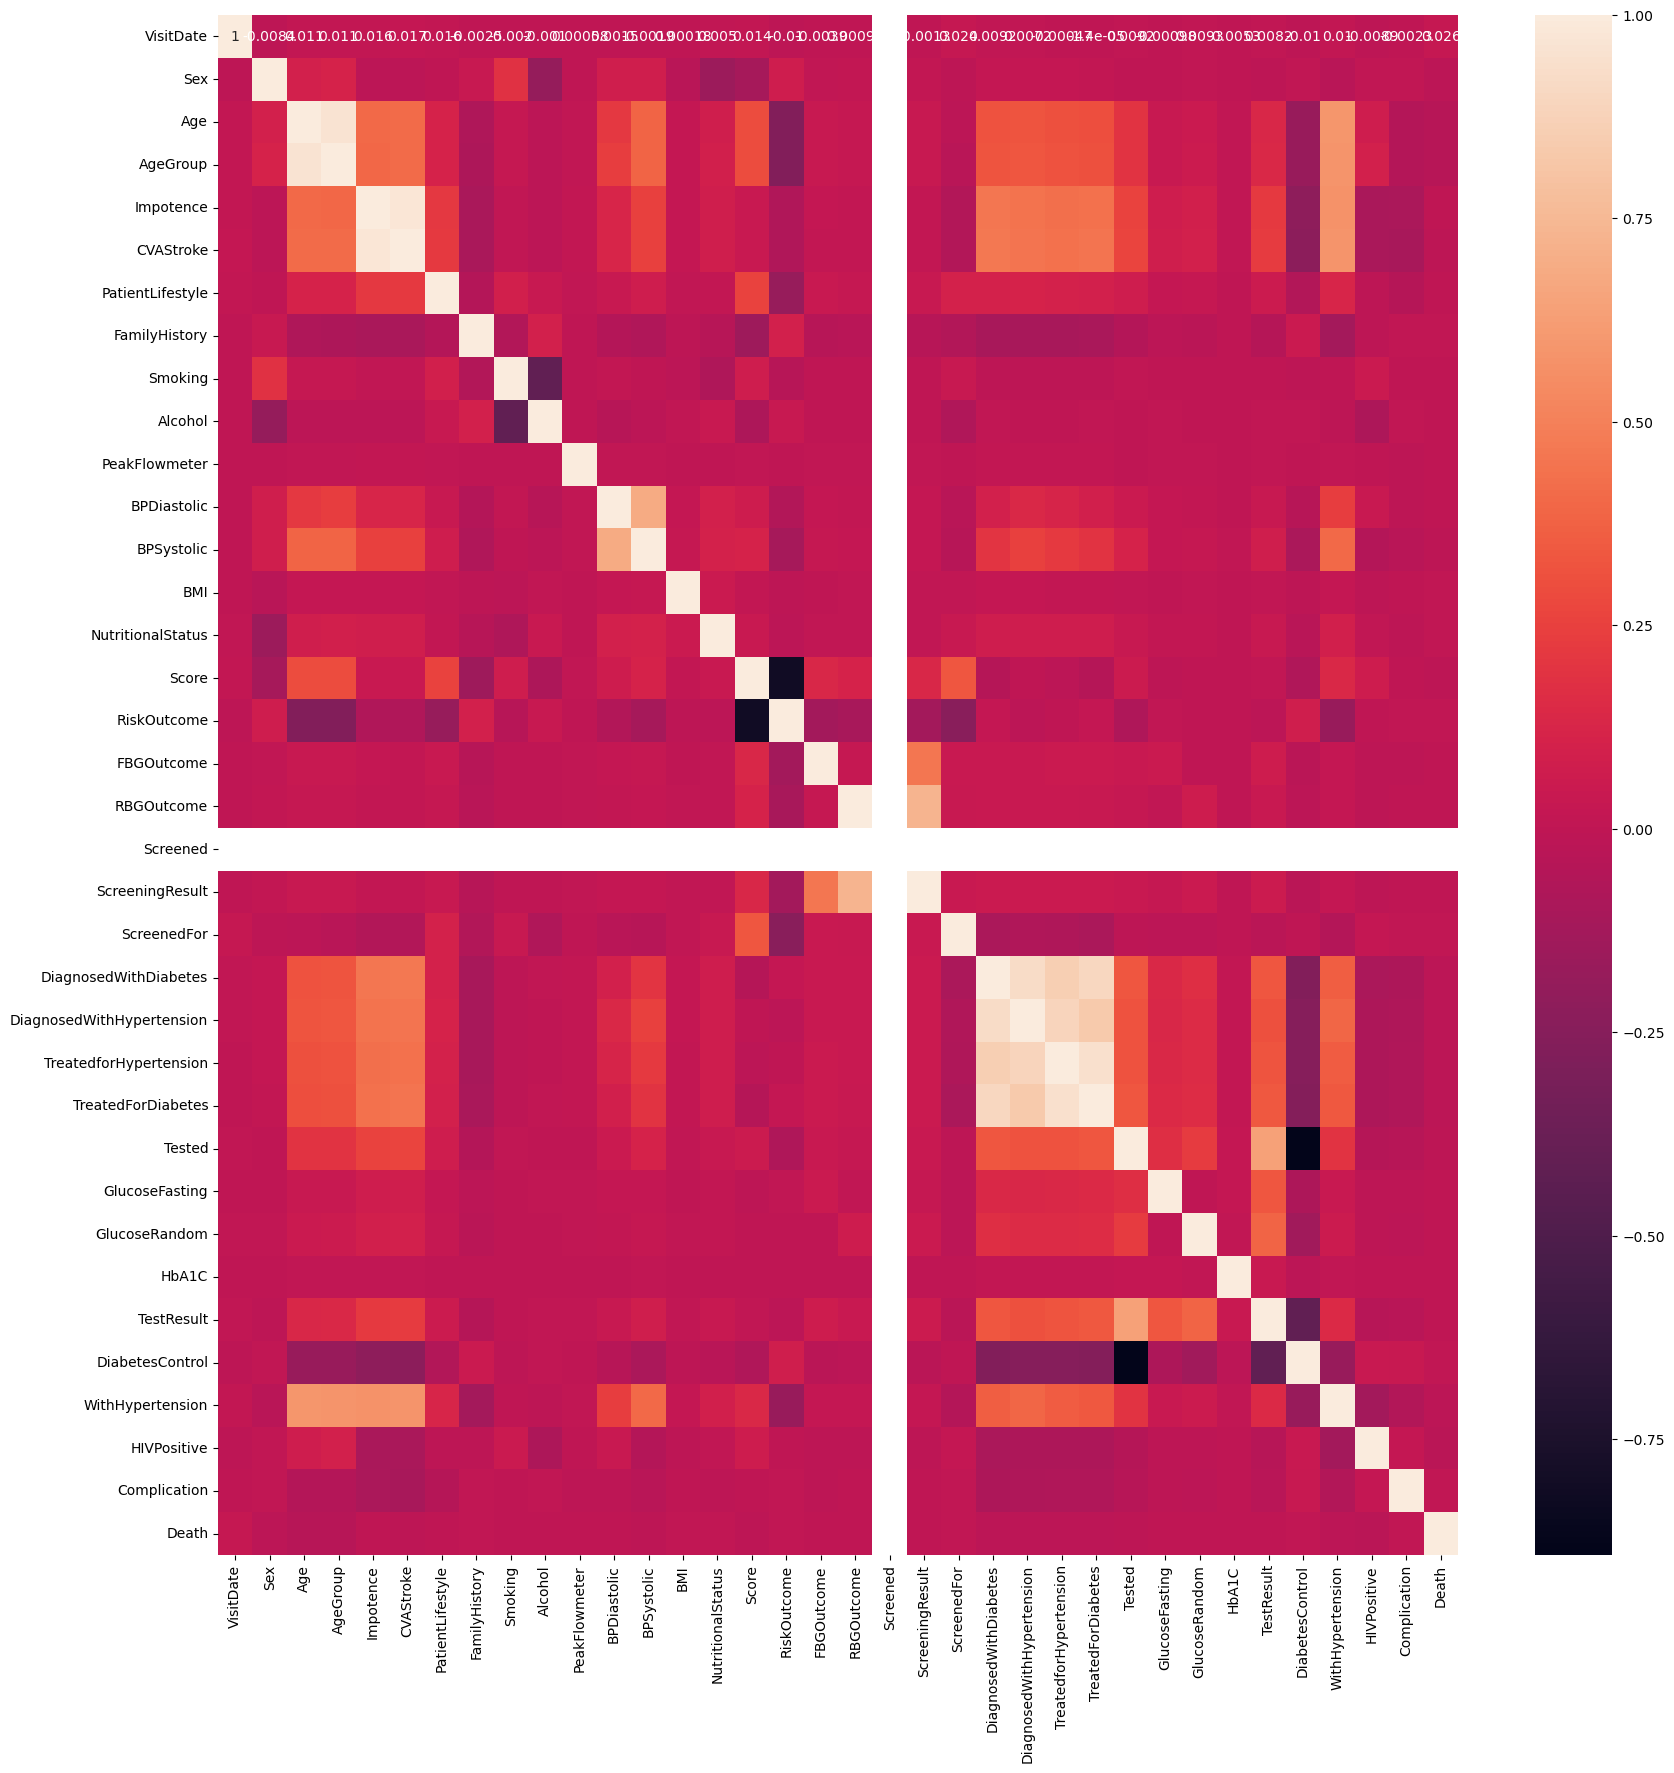

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
cor = df.corr()
sns.heatmap(cor,annot = True)
plt.show()

In [40]:
# df = df.drop('AgeGroupBins',axis=1)

In [41]:
df.Screened.unique()

array([0])

In [42]:
df

,VisitDate,Sex,Age,AgeGroup,Impotence,CVAStroke,PatientLifestyle,FamilyHistory,Smoking,Alcohol,...,Tested,GlucoseFasting,GlucoseRandom,HbA1C,TestResult,DiabetesControl,WithHypertension,HIVPositive,Complication,Death
0,2024-06-20,1,23,1,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
1,2024-03-07,1,22,1,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
2,2024-05-27,0,18,0,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
3,2024-03-07,0,25,2,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
4,2024-02-15,0,25,2,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2024-02-15,0,77,10,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,1,1,14,1
1048571,2024-07-23,0,50,7,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,1,0,14,1
1048572,2024-12-24,0,51,7,2,2,1,3,0,1,...,1,11.7,6.4,8.95,5,1,1,0,14,1
1048573,2024-11-07,0,20,1,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1


c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

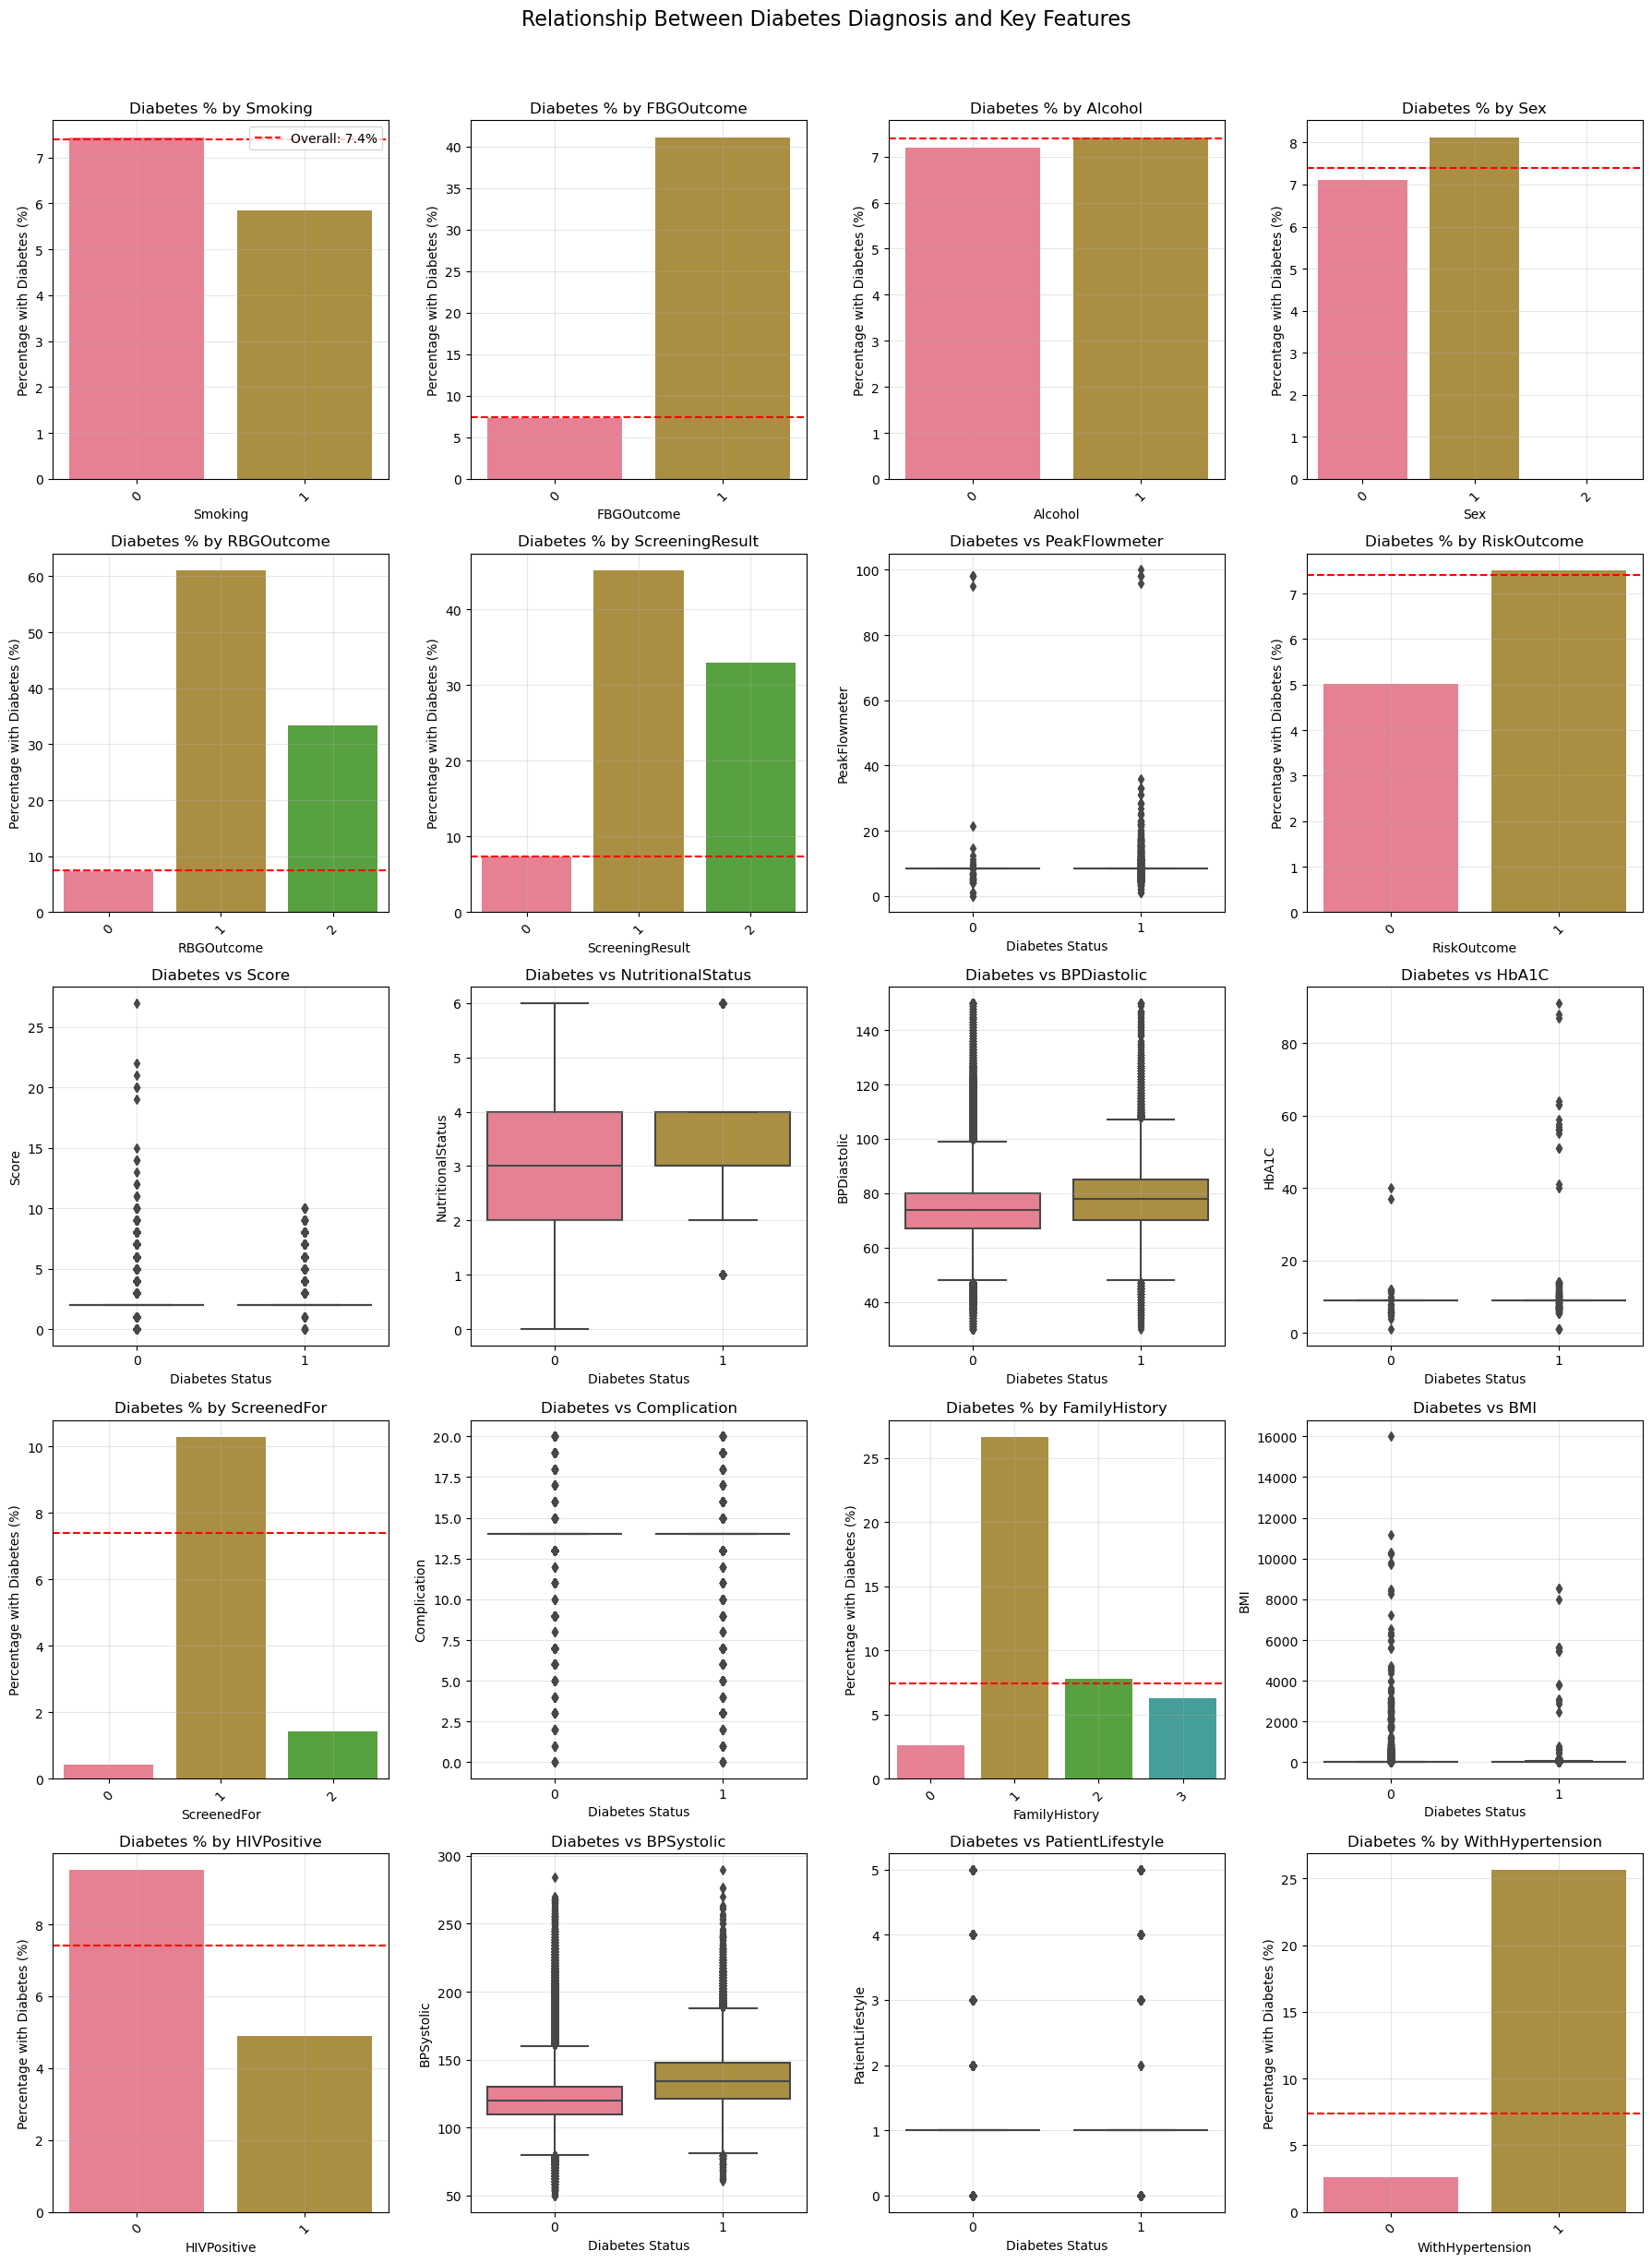

c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

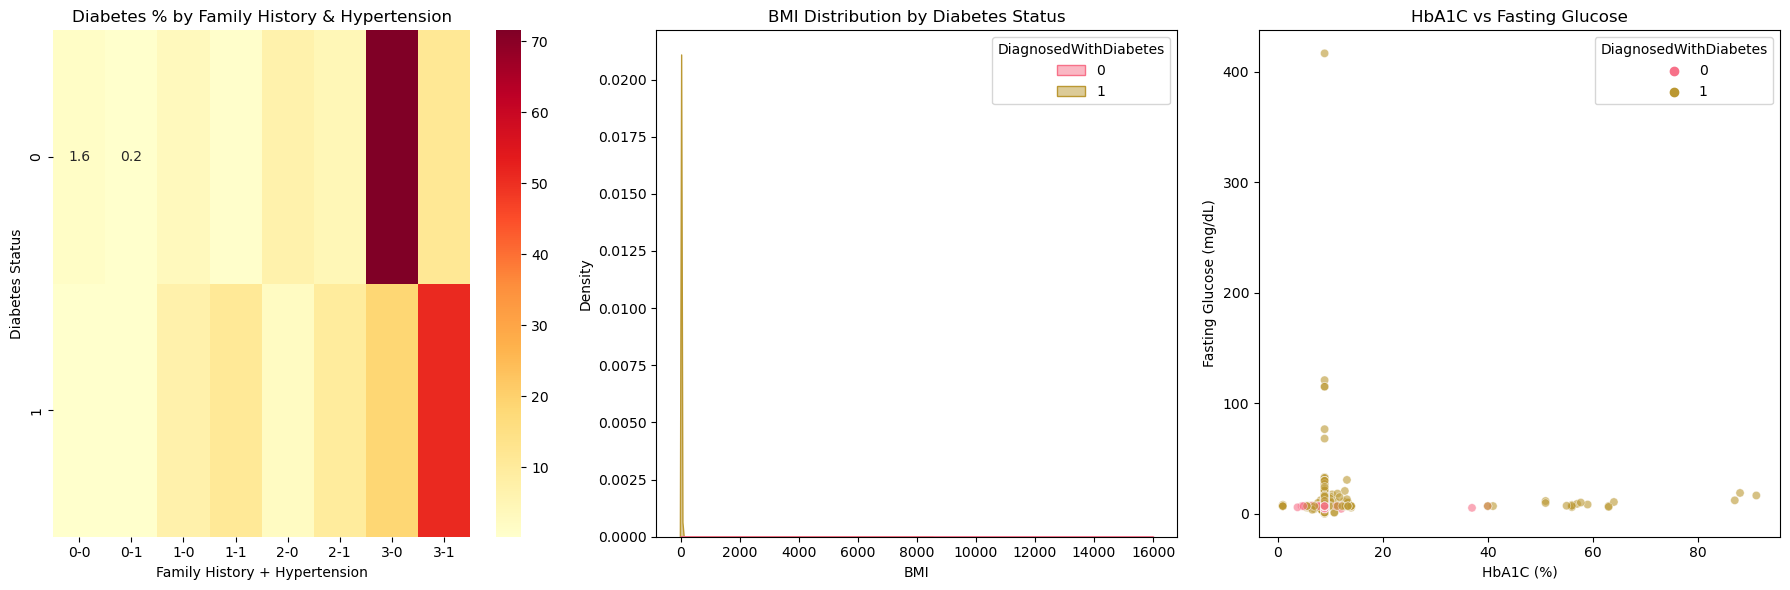

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_palette("husl")

# Select features to analyze
features = ['Smoking', 'FBGOutcome', 'Alcohol', 'Sex', 'RBGOutcome', 
            'ScreeningResult', 'PeakFlowmeter', 'RiskOutcome', 'Score', 
            'NutritionalStatus', 'BPDiastolic', 'HbA1C', 'ScreenedFor', 
            'Complication', 'FamilyHistory', 'BMI', 'HIVPositive',
            'BPSystolic', 'PatientLifestyle', 'WithHypertension']

# Create figure
plt.figure(figsize=(18, 24))
plt.suptitle('Relationship Between Diabetes Diagnosis and Key Features', 
             y=1.02, fontsize=16)

# Plot each feature
for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)
    
    # Handle different feature types
    if df[feature].nunique() <= 5:  # Categorical features
        # Calculate percentage with diabetes by category
        diabetes_rate = df.groupby(feature)['DiagnosedWithDiabetes'].mean() * 100
        diabetes_rate = diabetes_rate.sort_values(ascending=False)
        
        # Plot
        sns.barplot(x=diabetes_rate.index, y=diabetes_rate.values)
        plt.title(f'Diabetes % by {feature}')
        plt.ylabel('Percentage with Diabetes (%)')
        plt.xticks(rotation=45)
        plt.axhline(y=df['DiagnosedWithDiabetes'].mean()*100, 
                    color='red', linestyle='--', 
                    label=f'Overall: {df["DiagnosedWithDiabetes"].mean()*100:.1f}%')
        
    else:  # Continuous features
        sns.boxplot(x='DiagnosedWithDiabetes', y=feature, data=df)
        plt.title(f'Diabetes vs {feature}')
        plt.xlabel('Diabetes Status')
        plt.ylabel(feature)
        
    # Formatting
    plt.grid(True, alpha=0.3)
    if i == 1:
        plt.legend()

plt.tight_layout()
plt.show()

# Additional specialized plots for key relationships
plt.figure(figsize=(18, 6))

# Plot 1: Diabetes prevalence by multiple categorical features
plt.subplot(1, 3, 1)
sns.heatmap(pd.crosstab(df['DiagnosedWithDiabetes'], 
                       [df['FamilyHistory'], df['WithHypertension']],
                       normalize='index')*100,
            annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Diabetes % by Family History & Hypertension')
plt.ylabel('Diabetes Status')
plt.xlabel('Family History + Hypertension')

# Plot 2: Continuous feature distributions
plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='BMI', hue='DiagnosedWithDiabetes', 
            fill=True, common_norm=False, alpha=0.5)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Density')

# Plot 3: HbA1C vs Glucose
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='HbA1C', y='GlucoseFasting', 
               hue='DiagnosedWithDiabetes', alpha=0.6)
plt.title('HbA1C vs Fasting Glucose')
plt.xlabel('HbA1C (%)')
plt.ylabel('Fasting Glucose (mg/dL)')

plt.tight_layout()
plt.show()

# Feature selection

In [44]:
df

,VisitDate,Sex,Age,AgeGroup,Impotence,CVAStroke,PatientLifestyle,FamilyHistory,Smoking,Alcohol,...,Tested,GlucoseFasting,GlucoseRandom,HbA1C,TestResult,DiabetesControl,WithHypertension,HIVPositive,Complication,Death
0,2024-06-20,1,23,1,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
1,2024-03-07,1,22,1,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
2,2024-05-27,0,18,0,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
3,2024-03-07,0,25,2,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
4,2024-02-15,0,25,2,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2024-02-15,0,77,10,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,1,1,14,1
1048571,2024-07-23,0,50,7,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,1,0,14,1
1048572,2024-12-24,0,51,7,2,2,1,3,0,1,...,1,11.7,6.4,8.95,5,1,1,0,14,1
1048573,2024-11-07,0,20,1,1,1,1,3,0,1,...,0,6.9,6.4,8.95,2,2,0,0,14,1


**Univariate Selection: using Select K Best using chi2**

In [45]:

# Assuming X is your feature matrix and y is your target variable
# Drop columns that leak future information
X = df.drop(columns=['DiagnosedWithDiabetes', 'VisitDate','DiabetesControl','Age','TreatedforHypertension','TreatedForDiabetes','Death','FBGOutcome', 'RBGOutcome', 'ScreeningResult', 
                           'TestResult', 'Complication','DiagnosedWithHypertension', 'GlucoseFasting', 'GlucoseRandom', 
    'Tested', 'ScreeningResult', 'HbA1C', 'TestResult'])
y = df['DiagnosedWithDiabetes']

In [46]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif as MIC


# Apply SelectKBest to extract top 10 features
best_features = SelectKBest(score_func=chi2, k=15)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatenate dataframes for better visualization
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(15, 'Score'))


              Feature          Score
1            AgeGroup  227157.321891
10         BPSystolic  114096.181823
17   WithHypertension  104590.876378
11                BMI   29126.070169
3           CVAStroke   19545.742478
2           Impotence   18211.231548
9         BPDiastolic   15715.001653
4    PatientLifestyle    4756.517884
18        HIVPositive    4330.992368
16        ScreenedFor    1863.277407
5       FamilyHistory    1654.249561
12  NutritionalStatus    1352.978334
13              Score     711.612285
0                 Sex     224.527784
6             Smoking      90.777886


In [47]:
X

,Sex,AgeGroup,Impotence,CVAStroke,PatientLifestyle,FamilyHistory,Smoking,Alcohol,PeakFlowmeter,BPDiastolic,BPSystolic,BMI,NutritionalStatus,Score,RiskOutcome,Screened,ScreenedFor,WithHypertension,HIVPositive
0,1,1,1,1,1,3,0,1,8.5,94.0,134.0,23.66,2,2.0,1,0,1,0,0
1,1,1,1,1,1,3,0,1,8.5,67.0,118.0,23.66,2,2.0,1,0,1,0,0
2,0,0,1,1,1,3,0,1,8.5,65.0,109.0,26.41,2,2.0,1,0,2,0,0
3,0,2,1,1,1,3,0,1,8.5,52.0,119.0,26.06,4,2.0,1,0,1,0,0
4,0,2,1,1,1,3,0,1,8.5,66.0,112.0,25.81,4,2.0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,10,1,1,1,3,0,1,8.5,68.0,169.0,30.31,3,2.0,1,0,1,1,1
1048571,0,7,1,1,1,3,0,1,8.5,75.0,124.0,44.26,3,2.0,1,0,1,1,0
1048572,0,7,2,2,1,3,0,1,8.5,73.0,155.0,43.87,3,2.0,1,0,1,1,0
1048573,0,1,1,1,1,3,0,1,8.5,74.0,121.0,31.59,3,2.0,1,0,1,0,0


In [48]:
#Current features
MIC_features_names = best_features.feature_names_in_
# Extract the required features
new_features_MIC  = best_features.get_feature_names_out(MIC_features_names)
new_features_MIC

array(['Sex', 'AgeGroup', 'Impotence', 'CVAStroke', 'PatientLifestyle',
       'FamilyHistory', 'Smoking', 'BPDiastolic', 'BPSystolic', 'BMI',
       'NutritionalStatus', 'Score', 'ScreenedFor', 'WithHypertension',
       'HIVPositive'], dtype=object)

**Recursive Feature Elimination (RFE) with Logistic Regression**

In [49]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# rfe = RFE(model, n_features_to_select=20)
# fit = rfe.fit(X, y)
# print("Selected Features: %s" % list(X.columns[fit.support_]))


In [50]:
X = X.loc[:,new_features_MIC]
X

,Sex,AgeGroup,Impotence,CVAStroke,PatientLifestyle,FamilyHistory,Smoking,BPDiastolic,BPSystolic,BMI,NutritionalStatus,Score,ScreenedFor,WithHypertension,HIVPositive
0,1,1,1,1,1,3,0,94.0,134.0,23.66,2,2.0,1,0,0
1,1,1,1,1,1,3,0,67.0,118.0,23.66,2,2.0,1,0,0
2,0,0,1,1,1,3,0,65.0,109.0,26.41,2,2.0,2,0,0
3,0,2,1,1,1,3,0,52.0,119.0,26.06,4,2.0,1,0,0
4,0,2,1,1,1,3,0,66.0,112.0,25.81,4,2.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,10,1,1,1,3,0,68.0,169.0,30.31,3,2.0,1,1,1
1048571,0,7,1,1,1,3,0,75.0,124.0,44.26,3,2.0,1,1,0
1048572,0,7,2,2,1,3,0,73.0,155.0,43.87,3,2.0,1,1,0
1048573,0,1,1,1,1,3,0,74.0,121.0,31.59,3,2.0,1,0,0


# DiagnosedWithDiabetes Distribution

c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


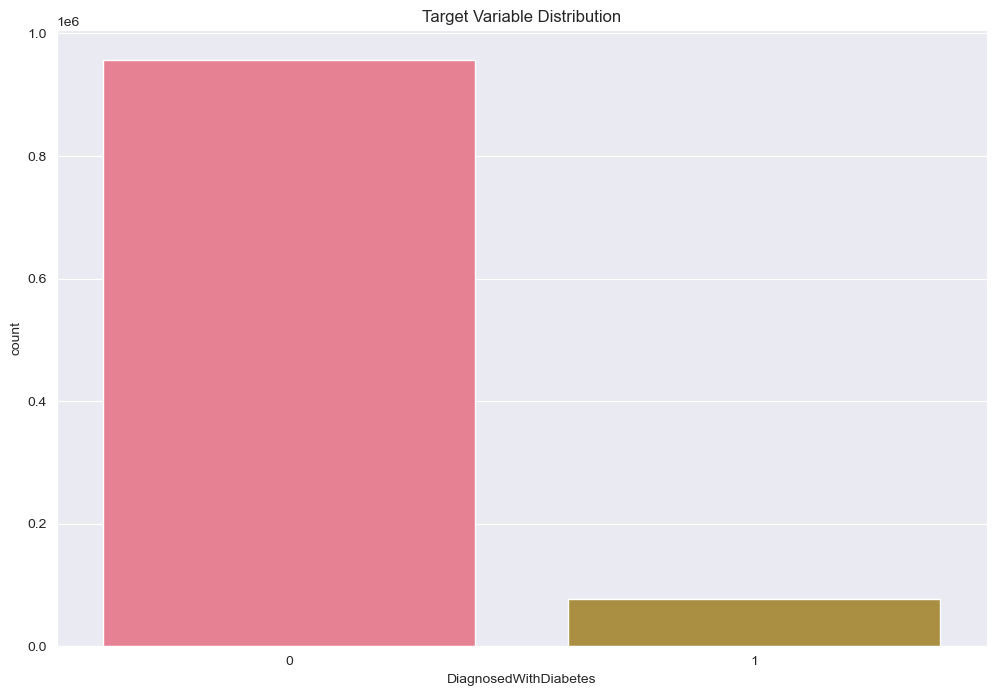

In [51]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
sns.countplot(x = 'DiagnosedWithDiabetes', data = df)
plt.title('Target Variable Distribution')
plt.show()

**Balancing target variable to remove bias**

In [52]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

ros = SMOTE(random_state = 15)
X_res,y_res = ros.fit_resample(X,y)
x = pd.DataFrame(X_res)
y = pd.DataFrame(y_res)

df = pd.concat([x,y], axis = 1)
df

,Sex,AgeGroup,Impotence,CVAStroke,PatientLifestyle,FamilyHistory,Smoking,BPDiastolic,BPSystolic,BMI,NutritionalStatus,Score,ScreenedFor,WithHypertension,HIVPositive,DiagnosedWithDiabetes
0,1,1,1,1,1,3,0,94.000000,134.000000,23.660000,2,2.0,1,0,0,0
1,1,1,1,1,1,3,0,67.000000,118.000000,23.660000,2,2.0,1,0,0,0
2,0,0,1,1,1,3,0,65.000000,109.000000,26.410000,2,2.0,2,0,0,0
3,0,2,1,1,1,3,0,52.000000,119.000000,26.060000,4,2.0,1,0,0,0
4,0,2,1,1,1,3,0,66.000000,112.000000,25.810000,4,2.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914059,0,8,1,1,1,3,0,79.000000,148.000000,26.410000,2,2.0,1,0,0,1
1914060,0,10,1,1,1,3,0,72.000000,128.000000,26.410000,2,2.0,1,1,0,1
1914061,0,10,2,2,1,3,0,79.000000,143.160502,40.511480,3,2.0,1,1,0,1
1914062,0,10,2,2,1,3,0,90.000000,148.000000,33.584791,3,2.0,1,1,0,1


**Balanced dataset**

c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Simphiwe\.conda\envs\flasky\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


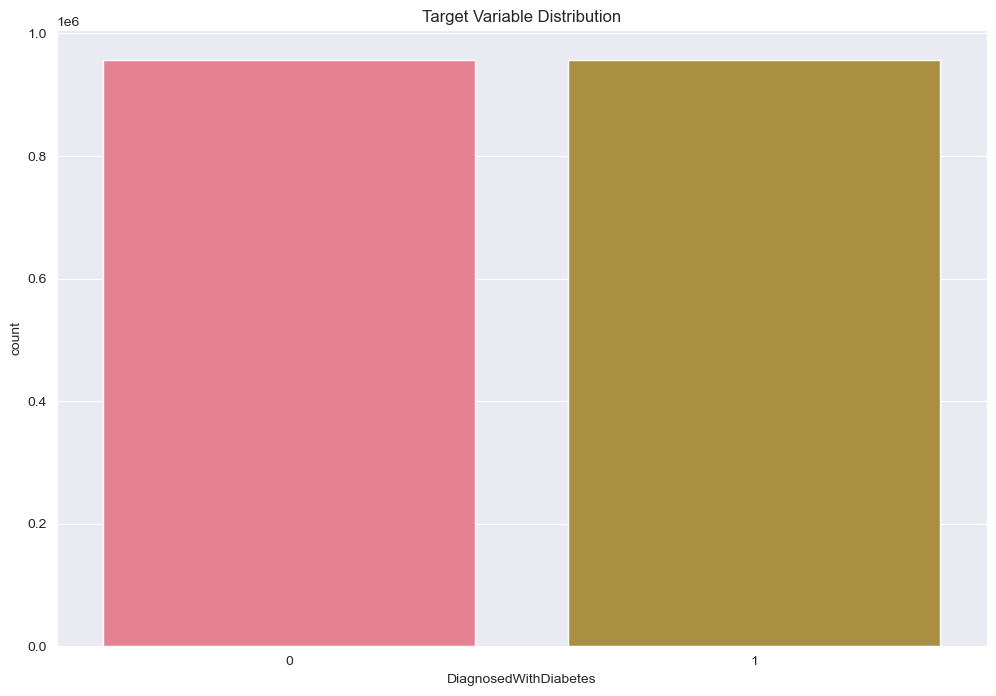

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(x = 'DiagnosedWithDiabetes', data = df)
plt.title('Target Variable Distribution')
plt.show()

# Modelling

**Splitting dataset into trainng and test sets**

In [54]:
df

,Sex,AgeGroup,Impotence,CVAStroke,PatientLifestyle,FamilyHistory,Smoking,BPDiastolic,BPSystolic,BMI,NutritionalStatus,Score,ScreenedFor,WithHypertension,HIVPositive,DiagnosedWithDiabetes
0,1,1,1,1,1,3,0,94.000000,134.000000,23.660000,2,2.0,1,0,0,0
1,1,1,1,1,1,3,0,67.000000,118.000000,23.660000,2,2.0,1,0,0,0
2,0,0,1,1,1,3,0,65.000000,109.000000,26.410000,2,2.0,2,0,0,0
3,0,2,1,1,1,3,0,52.000000,119.000000,26.060000,4,2.0,1,0,0,0
4,0,2,1,1,1,3,0,66.000000,112.000000,25.810000,4,2.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914059,0,8,1,1,1,3,0,79.000000,148.000000,26.410000,2,2.0,1,0,0,1
1914060,0,10,1,1,1,3,0,72.000000,128.000000,26.410000,2,2.0,1,1,0,1
1914061,0,10,2,2,1,3,0,79.000000,143.160502,40.511480,3,2.0,1,1,0,1
1914062,0,10,2,2,1,3,0,90.000000,148.000000,33.584791,3,2.0,1,1,0,1


In [55]:
y = df['DiagnosedWithDiabetes']
X = df.drop(columns=['DiagnosedWithDiabetes'])
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify= y,test_size=0.3,random_state=15)

**Random Forest Clasifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(
    max_depth=5,           # Limit tree depth
    min_samples_split=10,  # Require more samples to split
    class_weight='balanced',  # Handle residual imbalance
    n_estimators=200       # Increase trees (default=100)
)

model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions1))
print(balanced_accuracy_score(y_test, predictions1))
print (classification_report(y_test,predictions1))

Accuracy: 0.8678224373933335
0.8678224373933335
              precision    recall  f1-score   support

           0       0.88      0.85      0.87    287110
           1       0.86      0.88      0.87    287110

    accuracy                           0.87    574220
   macro avg       0.87      0.87      0.87    574220
weighted avg       0.87      0.87      0.87    574220



In [57]:
probs = model1.predict_proba(X_test)  # Array of [P(class=0), P(class=1)]
print(probs[:5])

[[0.96658624 0.03341376]
 [0.06305151 0.93694849]
 [0.96124565 0.03875435]
 [0.49806995 0.50193005]
 [0.59754508 0.40245492]]


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, val_scores = learning_curve(model1,X,y,cv=5, scoring='accuracy')

plt.plot(train_sizes, np.mean(train_scores, axis = 1), label = 'Training Score')
plt.plot(train_sizes, np.mean(val_scores,axis = 1 ), label = 'Validation Score')
plt.legend()
plt.show()

In [ ]:

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Enhanced plotting
plt.figure(figsize=(10, 6)) 
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 's-', color='green', label='Validation Accuracy')

# Add shaded areas for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

# Annotations and formatting
plt.title('Learning Curve', fontsize=14)
plt.xlabel('Training Examples', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1.1)  # Adjust based on your metric range
plt.show()

**Neural Network**

In [58]:
from sklearn.neural_network import MLPClassifier
model2 = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions2))
print (balanced_accuracy_score(y_test, predictions2))
print (classification_report(y_test,predictions2))


Accuracy: 0.8724461007976037
0.8724461007976037
              precision    recall  f1-score   support

           0       0.92      0.82      0.87    287110
           1       0.84      0.93      0.88    287110

    accuracy                           0.87    574220
   macro avg       0.88      0.87      0.87    574220
weighted avg       0.88      0.87      0.87    574220



**Gradient Boosting Classifier**

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier()
model3.fit(X_train, y_train)
predictions3 = model3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions3))
print (balanced_accuracy_score(y_test, predictions3))
print (classification_report(y_test,predictions3))


Accuracy: 0.8813782174079621
0.8813782174079621
              precision    recall  f1-score   support

           0       0.90      0.86      0.88    287110
           1       0.86      0.91      0.88    287110

    accuracy                           0.88    574220
   macro avg       0.88      0.88      0.88    574220
weighted avg       0.88      0.88      0.88    574220



In [ ]:
# train_sizes, train_scores, val_scores = learning_curve(model3, X, y, cv=5, scoring='accuracy')
# plt.plot(train_sizes, np.mean(val_scores, axis=1), label='validation scores')
# plt.plot(train_sizes, np.mean(train_scores, axis=1), label='training scores')

# plt.legend()
# plt.show()

**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
# Initialize and train XGBoost model
model4 = XGBClassifier(
)
model4.fit(X_train, y_train)
predictions4 = model4.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions4))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, predictions4))
print(classification_report(y_test, predictions4))

Accuracy: 0.9090453136428547
Balanced Accuracy: 0.9090453136428547
              precision    recall  f1-score   support

           0       0.93      0.89      0.91    287110
           1       0.89      0.93      0.91    287110

    accuracy                           0.91    574220
   macro avg       0.91      0.91      0.91    574220
weighted avg       0.91      0.91      0.91    574220



In [ ]:
# train_sizes, train_scores, val_scores = learning_curve(model4, X, y, cv=5, scoring='accuracy')
# plt.plot(train_sizes, np.mean(val_scores, axis=1), label='validation scores')
# plt.plot(train_sizes, np.mean(train_scores, axis=1), label='training validation')
# plt.legend()
# plt.show()


Saving the best performing model

In [ ]:
# pip install shap

In [ ]:
pickle.dump(model1,open('model.pkl','wb'))

In [ ]:
# pip install ipywidgets

In [ ]:
# Get probabilities and predictions
probs = model1.predict_proba(X_test)[:, 1]  # P(class=1)
predictions = model1.predict(X_test)

# Find uncertain predictions (close to 0.5 threshold)
uncertain_mask = (probs > 0.4) & (probs < 0.6)
uncertain_samples = X_test[uncertain_mask]

print(f"{uncertain_samples.shape[0]} uncertain predictions (P ≈ 0.5)")

In [63]:
import shap
import numpy as np

# 1. Initialize explainer
explainer = shap.TreeExplainer(model1)

# 2. Get SHAP values - returns list of arrays for each class
shap_values = explainer.shap_values(X_test)

# 3. For binary classification, use SHAP values for class 1
shap_values_class1 = shap_values[1]  # Shape: (n_samples, n_features)

# 4. Prepare the first sample
sample_idx = 0
sample_features = X_test.iloc[sample_idx].values  # Convert to numpy array
feature_names = X_test.columns.tolist()

# 5. Verify dimensions match
print(f"SHAP values shape: {shap_values_class1[sample_idx].shape}")
print(f"Features shape: {sample_features.shape}")
assert len(shap_values_class1[sample_idx]) == len(sample_features), "Dimension mismatch!"

# 6. Create the force plot with all required parameters
shap.initjs()  # Initialize JS visualization
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values_class1[sample_idx],
    features=sample_features,
    feature_names=feature_names,
    matplotlib=True,  # Set to False if you want interactive plot
    show=False  # Set to True if you want to display immediately
)

SHAP values shape: (2,)
Features shape: (15,)


AssertionError: Dimension mismatch!

In [64]:
print("SHAP values shape:", np.array(shap_values).shape)
print("X_test shape:", X_test.shape)

SHAP values shape: (574220, 15, 2)
X_test shape: (574220, 15)
